/opt/anaconda3/lib/python3.12/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


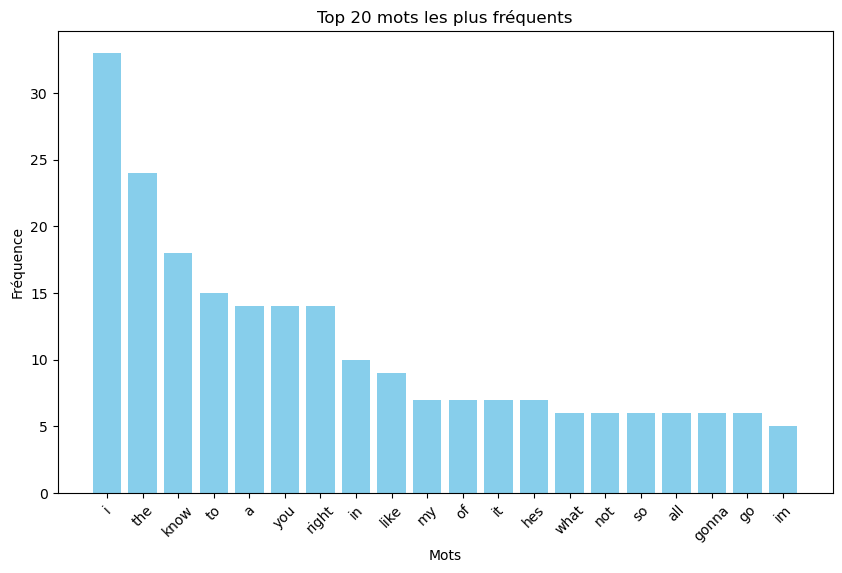

In [12]:
import whisper
import re
from collections import Counter
import matplotlib.pyplot as plt

def transcribe_audio(audio_file):
    # Charger le modèle Whisper
    model = whisper.load_model("base")
    
    # Transcrire l'audio
    result = model.transcribe(audio_file)
    
    # Récupérer le texte transcrit
    transcript = result["text"]
    return transcript

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Regex supprimant la ponctuation
    text = text.lower()  # Convertit tout en minuscule
    return text

def get_word_frequencies(text):
    # Diviser le texte en mots
    words = text.split()
    
    # Compter la fréquence de chaque mot
    word_frequencies = Counter(words)
    
    # Retourner les mots les plus fréquents
    return word_frequencies

def plot_word_frequencies(word_frequencies, top_n=20):
    # Extraire les mots et leur fréquence
    most_common_words = word_frequencies.most_common(top_n)
    words = [word for word, _ in most_common_words]
    frequencies = [freq for _, freq in most_common_words]
    
    # Créer un histogramme
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    
    # Ajouter des labels et un titre
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.title(f'Top {top_n} mots les plus fréquents')
    
    # Rotation des étiquettes pour améliorer la lisibilité
    plt.xticks(rotation=45)
    
    # Afficher l'histogramme
    plt.show()

def main(audio_file):
    # Transcrire l'audio
    transcript = transcribe_audio(audio_file)
    
    # Nettoyer et traiter le texte
    cleaned_text = preprocess_text(transcript)
    
    # Calculer la fréquence des mots
    word_frequencies = get_word_frequencies(cleaned_text)
    
    # Afficher les mots les plus fréquents (histogramme)
    plot_word_frequencies(word_frequencies, top_n=20)

if __name__ == "__main__":
    audio_file = "/Users/chloe/Downloads/Projet_1_Montacié/synthRadio201_16.wav"  
    main(audio_file)

In [13]:
import parselmouth
from parselmouth.praat import call
import numpy as np

audio_path = "/Users/chloe/Downloads/Projet_1_Montacié/synthRadio201_16.wav"
sound = parselmouth.Sound(audio_path)

# Obtenir les formants pour les caractéristiques vocales
formant = sound.to_formant_burg()

# Calculer la fréquence fondamentale moyenne (F0)
pitch = sound.to_pitch()
mean_f0 = call(pitch, "Get mean", 0, 0, "Hertz")
print(f"Fréquence fondamentale moyenne (F0) : {mean_f0} Hz")

# Calculer la moyenne des formants en Hertz
mean_f1 = call(formant, "Get mean", 1, 0, 0, "Hertz")  # Formant 1 (F1)
mean_f2 = call(formant, "Get mean", 2, 0, 0, "Hertz")  # Formant 2 (F2)

print(f"Moyenne de F1 : {mean_f1} Hz")
print(f"Moyenne de F2 : {mean_f2} Hz")

# Calcul de l'intensité moyenne
intensity = sound.to_intensity()
mean_intensity = call(intensity, "Get mean", 0, 0)
print(f"Intensité moyenne : {mean_intensity} dB")

Fréquence fondamentale moyenne (F0) : 149.96831693813212 Hz
Moyenne de F1 : 893.3452952003702 Hz
Moyenne de F2 : 1949.8432465449387 Hz
Intensité moyenne : 68.64990619874547 dB


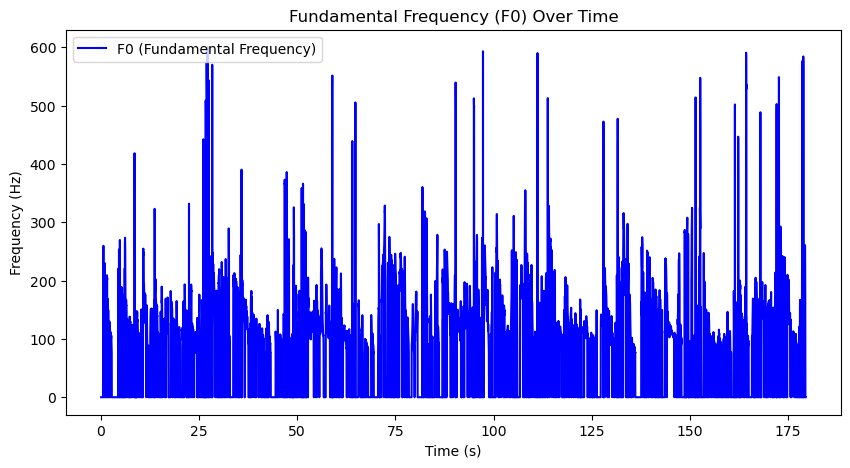

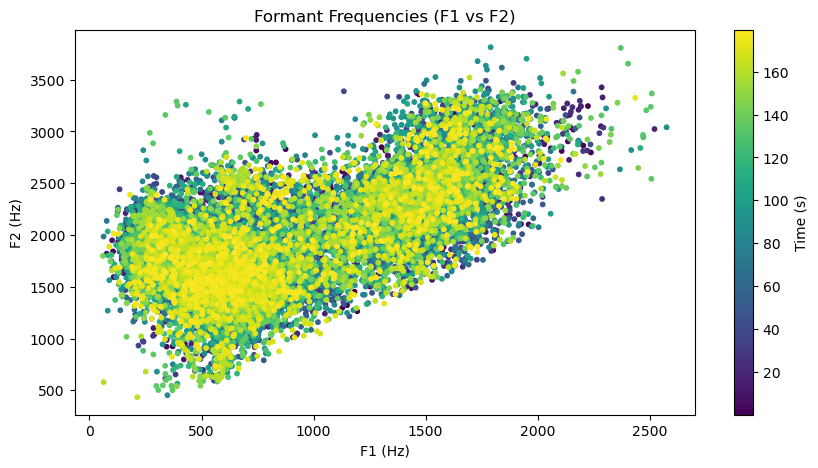

In [14]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from parselmouth.praat import call

# Load the audio file
audio_path = "/Users/chloe/Downloads/Projet_1_Montacié/synthRadio201_16.wav"  # Replace with your file path
sound = parselmouth.Sound(audio_path)

# Extract F0 (Fundamental Frequency)
pitch = sound.to_pitch()
times = pitch.xs()
f0_values = pitch.selected_array['frequency']

# Plot F0 (Fundamental Frequency)
plt.figure(figsize=(10, 5))
plt.plot(times, f0_values, label="F0 (Fundamental Frequency)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Fundamental Frequency (F0) Over Time")
plt.legend()
plt.show()

# Extract Formants (F1 and F2)
formant = sound.to_formant_burg()
f1_values, f2_values = [], []
f1_times, f2_times = [], []

for t in times:
    try:
        f1 = call(formant, "Get value at time", 1, t, "Hertz", "Linear")
        f2 = call(formant, "Get value at time", 2, t, "Hertz", "Linear")
        if not np.isnan(f1) and not np.isnan(f2):
            f1_values.append(f1)
            f2_values.append(f2)
            f1_times.append(t)
            f2_times.append(t)
    except:
        pass  # Handle errors gracefully

# Plot F1 and F2 in a two-dimensional space
plt.figure(figsize=(10, 5))
plt.scatter(f1_values, f2_values, c=f1_times, cmap="viridis", s=10)
plt.colorbar(label="Time (s)")
plt.xlabel("F1 (Hz)")
plt.ylabel("F2 (Hz)")
plt.title("Formant Frequencies (F1 vs F2)")
plt.show()
